In [21]:
import pandas as pd
from pyarrow import csv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [10]:
training_data = csv.read_csv("WestRoxbury.csv")
df = training_data.to_pandas()
df.columns = df.columns.str.replace(" ", "_")
df_encoded = pd.get_dummies(df, columns=["REMODEL"])

df_encoded

,TOTAL_VALUE_,TAX,LOT_SQFT_,YR_BUILT,GROSS_AREA_,LIVING_AREA,FLOORS_,ROOMS,BEDROOMS_,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_None,REMODEL_Old,REMODEL_Recent
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,True,False,False
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,False,False,True
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,True,False,False
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,True,False,False
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,5092,6762,1938,2594,1714,2.0,9,3,2,1,1,1,False,False,True
5798,407.9,5131,9408,1950,2414,1333,2.0,6,3,1,1,1,1,True,False,False
5799,406.5,5113,7198,1987,2480,1674,2.0,7,3,1,1,1,1,True,False,False
5800,308.7,3883,6890,1946,2000,1000,1.0,5,2,1,0,1,0,True,False,False


In [11]:
df_encoded = df_encoded.drop("TAX", axis=1)

In [15]:
value_model = LinearRegression()

target = "TOTAL_VALUE_"
predictors = [col for col in df_encoded.columns if (col != target and col != "REMODEL_Recent")]
print(predictors)
print(target)

['LOT_SQFT_', 'YR_BUILT', 'GROSS_AREA_', 'LIVING_AREA', 'FLOORS_', 'ROOMS', 'BEDROOMS_', 'FULL_BATH', 'HALF_BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL_None', 'REMODEL_Old']
TOTAL_VALUE_


In [16]:
x = df_encoded[predictors]
y_true = df_encoded[target]

value_model.fit(x, y_true)

y_pred = value_model.predict(x)

print(f"R2 Score: {r2_score(y_true, y_pred)}")

R2 Score: 0.8135276096013705


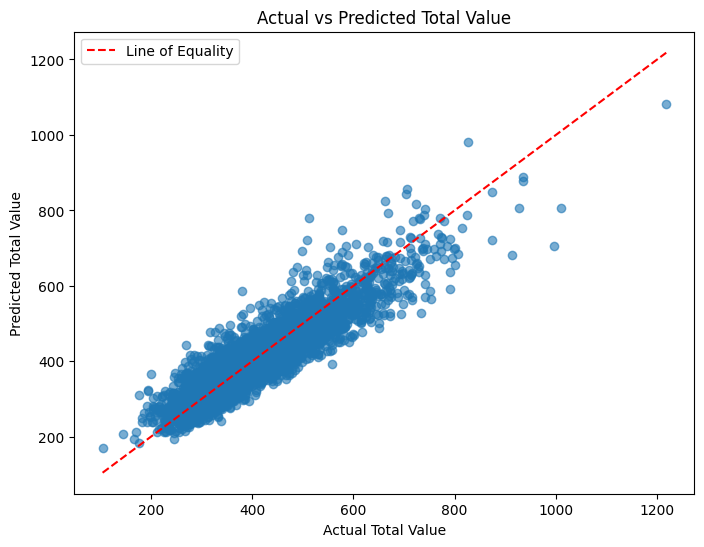

In [22]:
df_results = pd.DataFrame({"Actual": y_true, "Predicted": y_pred})

plt.figure(figsize=(8, 6))
plt.scatter(df_results["Actual"], df_results["Predicted"], alpha=0.6)
plt.title("Actual vs Predicted Total Value")
plt.xlabel("Actual Total Value")
plt.ylabel("Predicted Total Value")

min_val = min(df_results["Actual"].min(), df_results["Predicted"].min())
max_val = max(df_results["Actual"].max(), df_results["Predicted"].max())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Line of Equality")

plt.legend()
plt.show()


In [26]:
test_data = csv.read_csv("WRpredict.csv")
df_test = test_data.to_pandas()
df_test.columns = df_test.columns.str.replace(" ", "_")
df_test_encoded = pd.get_dummies(df_test, columns=["REMODEL"])
df_test_encoded

,LOT_SQFT_,YR_BUILT,GROSS_AREA_,LIVING_AREA,FLOORS_,ROOMS,BEDROOMS_,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_None,REMODEL_Old
0,9600,1896,3356,2078,2.0,7,3,2,1,1,0,False,True
1,5115,1930,3183,1858,2.0,7,4,1,1,1,0,True,False
2,4717,1910,2592,1572,2.0,7,3,1,1,1,0,True,False
3,7210,1950,3104,1395,1.0,6,3,1,1,1,1,True,False
4,2947,1991,1800,1800,2.0,6,3,1,1,1,1,True,False


In [41]:
test_predictors = list(df_test_encoded.columns)
x_test = df_test_encoded[test_predictors]
y_test = value_model.predict(x_test)
value_column = list(y_test)
df_test_encoded["TOTAL_VALUE"] = value_column
df_test_encoded

,LOT_SQFT_,YR_BUILT,GROSS_AREA_,LIVING_AREA,FLOORS_,ROOMS,BEDROOMS_,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_None,REMODEL_Old,TOTAL_VALUE
0,9600,1896,3356,2078,2.0,7,3,2,1,1,0,False,True,474.293175
1,5115,1930,3183,1858,2.0,7,4,1,1,1,0,True,False,396.149881
2,4717,1910,2592,1572,2.0,7,3,1,1,1,0,True,False,359.333778
3,7210,1950,3104,1395,1.0,6,3,1,1,1,1,True,False,367.725808
4,2947,1991,1800,1800,2.0,6,3,1,1,1,1,True,False,354.022731
